## Contents:

1. Import libraries and data
2. Data Wrangling
3. Data Cleaning
4. Cloropleth

## 1. Import Libraires and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Importing json file
country_geo = r'/Users/jacobyount/Documents/Data Analytics/Immersion 6/us-states.json'

In [4]:
path = r'/Users/jacobyount/Documents/Data Analytics/Immersion 6/College Football Portal and Recruiting Analysis'

In [5]:
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'cfb_portal_recruit_merged.pkl'))

In [6]:
df.shape

(52181, 19)

In [7]:
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'cfb_portal_recruit_merged.pkl'))

In [8]:
df.tail()

,season,first_name,last_name,position,school,transfer_to,transfer_date,rating,stars,eligibility,date_of_trasfer,time_of_transfer,ranking,committed_to,recruit_type,city,state_province,country,_merge
52176,2023,Jacob,Harris,WR,Westerville Central,NaN,NaN,0.7844,2.0,NaN,NaN,NaN,2299.0,Bowling Green,HighSchool,Westerville,OH,USA,right_only
52177,2023,Trey,Dubuc,LS,Cardinal Gibbons,NaN,NaN,0.7844,2.0,NaN,NaN,NaN,2300.0,South Florida,HighSchool,Fort Lauderdale,FL,USA,right_only
52178,2023,Ezekiel,Rodrigues,S,Mililani,NaN,NaN,0.7833,2.0,NaN,NaN,NaN,2301.0,Hawai'i,HighSchool,Mililani,HI,USA,right_only
52179,2023,DeAndre,Beasley Jr.,CB,Bishop Miege,NaN,NaN,0.7800,2.0,NaN,NaN,NaN,2302.0,NaN,HighSchool,Lees Summit,MO,USA,right_only
52180,2023,Brady,Probst,TE,Brownsburg,NaN,NaN,0.7733,2.0,NaN,NaN,NaN,2303.0,Illinois State,HighSchool,Brownsburg,IN,USA,right_only


## 2. Data Wrangling

In [9]:
# Fixing the abriviations in the state_province column

states = {'AL': 'Alabama',
            'AK': 'Alaska',
            'AZ': 'Arizona',
            'AR': 'Arkansas',
            'CA': 'California',
            'CO': 'Colorado',
            'CT': 'Connecticut',
            'DE': 'Delaware',
            'FL': 'Florida',
            'GA': 'Georgia',
            'HI': 'Hawaii',
            'ID': 'Idaho',
            'IL': 'Illinois',
            'IN': 'Indiana',
            'IA': 'Iowa',
            'KS': 'Kansas',
            'KY': 'Kentucky',
            'LA': 'Louisiana',
            'ME': 'Maine',
            'MD': 'Maryland',
            'MA': 'Massachusetts',
            'MI': 'Michigan',
            'MN': 'Minnesota',
            'MS': 'Mississippi',
            'MO': 'Missouri',
            'MT': 'Montana',
            'NE': 'Nebraska',
            'NV': 'Nevada',
            'NH': 'New Hampshire',
            'NJ': 'New Jersey',
            'NM': 'New Mexico',
            'NY': 'New York',
            'NC': 'North Carolina',
            'ND': 'North Dakota',
            'OH': 'Ohio',
            'OK': 'Oklahoma',
            'OR': 'Oregon',
            'PA': 'Pennsylvania',
            'RI': 'Rhode Island',
            'SC': 'South Carolina',
            'SD': 'South Dakota',
            'TN': 'Tennessee',
            'TX': 'Texas',
            'UT': 'Utah',
            'VT': 'Vermont',
            'VA': 'Virginia',
            'WA': 'Washington',
            'WV': 'West Virginia',
            'WI': 'Wisconsin',
            'WY': 'Wyoming',
            'DC': 'District of Columbia',
            'MP': 'Northern Mariana Islands',
            'PW': 'Palau',
            'PR': 'Puerto Rico',
            'VI': 'Virgin Islands',
            'AA': 'Armed Forces Americas (Except Canada)',
            'AE': 'Armed Forces Africa/Canada/Europe/Middle East',
            'AP': 'Armed Forces Pacific'}

In [10]:
df['state_province'] = df['state_province'].replace(states)

In [11]:
df['state_province'].tail()

52176        Ohio
52177     Florida
52178      Hawaii
52179    Missouri
52180     Indiana
Name: state_province, dtype: object

In [12]:
df.tail()

,season,first_name,last_name,position,school,transfer_to,transfer_date,rating,stars,eligibility,date_of_trasfer,time_of_transfer,ranking,committed_to,recruit_type,city,state_province,country,_merge
52176,2023,Jacob,Harris,WR,Westerville Central,NaN,NaN,0.7844,2.0,NaN,NaN,NaN,2299.0,Bowling Green,HighSchool,Westerville,Ohio,USA,right_only
52177,2023,Trey,Dubuc,LS,Cardinal Gibbons,NaN,NaN,0.7844,2.0,NaN,NaN,NaN,2300.0,South Florida,HighSchool,Fort Lauderdale,Florida,USA,right_only
52178,2023,Ezekiel,Rodrigues,S,Mililani,NaN,NaN,0.7833,2.0,NaN,NaN,NaN,2301.0,Hawai'i,HighSchool,Mililani,Hawaii,USA,right_only
52179,2023,DeAndre,Beasley Jr.,CB,Bishop Miege,NaN,NaN,0.7800,2.0,NaN,NaN,NaN,2302.0,NaN,HighSchool,Lees Summit,Missouri,USA,right_only
52180,2023,Brady,Probst,TE,Brownsburg,NaN,NaN,0.7733,2.0,NaN,NaN,NaN,2303.0,Illinois State,HighSchool,Brownsburg,Indiana,USA,right_only


In [13]:
df.to_csv(os.path.join(path, 'Data','Prepared Data', 'CFB_DF.csv'))


In [12]:
columns = ['season', 'position', 'stars', 'recruit_type', 'state_province', 'rating']

In [100]:
state_star_rating = df[columns]

In [101]:
state_star_rating.shape

(52181, 6)

In [102]:
state_star_rating.head()

,season,position,stars,recruit_type,state_province,rating
0,2021,LB,3.0,NaN,NaN,NaN
1,2021,DL,4.0,NaN,NaN,NaN
2,2021,S,3.0,NaN,NaN,NaN
3,2021,LB,3.0,NaN,NaN,NaN
4,2021,RB,3.0,NaN,NaN,NaN


## 3. Wrangling

Consitency Checks

In [103]:
# Check for missing values

state_star_rating.isnull().sum()

season               0
position            19
stars              678
recruit_type      5778
state_province    6106
rating            3837
dtype: int64

In [104]:
#replacing the n=missing star rating with the median
state_star_rating['stars'].fillna(state_star_rating['stars'].median(), inplace=True)

/var/folders/76/mj0jm8j14qqbqx0rbfznx25w0000gn/T/ipykernel_21314/1523259131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_star_rating['stars'].fillna(state_star_rating['stars'].median(), inplace=True)


In [105]:
# Dropping missing state_providence value
state_star_rating['state_province'].dropna()

5778           Missouri
5779              Texas
5780     North Carolina
5781         California
5782       Pennsylvania
              ...      
52176              Ohio
52177           Florida
52178            Hawaii
52179          Missouri
52180           Indiana
Name: state_province, Length: 46075, dtype: object

In [106]:
# Rechecking missing values
state_star_rating.isnull().sum()

season               0
position            19
stars                0
recruit_type      5778
state_province    6106
rating            3837
dtype: int64

In [107]:
state_star=state_star_rating.dropna()

In [108]:
state_star.head()

,season,position,stars,recruit_type,state_province,rating
5778,2012,WR,5.0,HighSchool,Missouri,0.9997
5779,2012,DT,5.0,HighSchool,Texas,0.9995
5780,2012,OT,5.0,HighSchool,North Carolina,0.9979
5781,2012,S,5.0,HighSchool,California,0.9975
5782,2012,WDE,5.0,HighSchool,Pennsylvania,0.9974


In [109]:
state_star.isnull().sum()

season            0
position          0
stars             0
recruit_type      0
state_province    0
rating            0
dtype: int64

<AxesSubplot:xlabel='stars', ylabel='Count'>

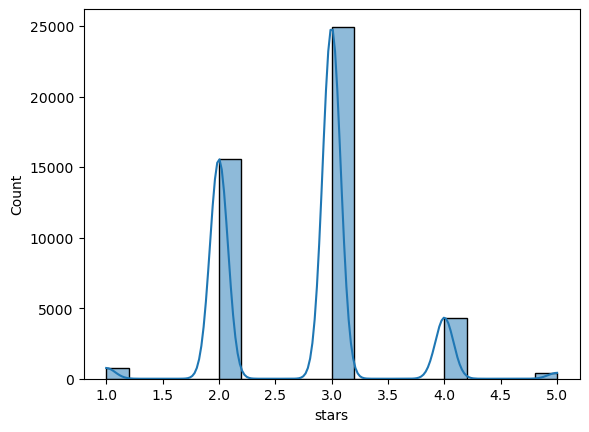

In [110]:
# checking for extreme values in stars rating
sns.histplot(state_star['stars'], bins=20, kde = True)

<AxesSubplot:xlabel='rating', ylabel='Count'>

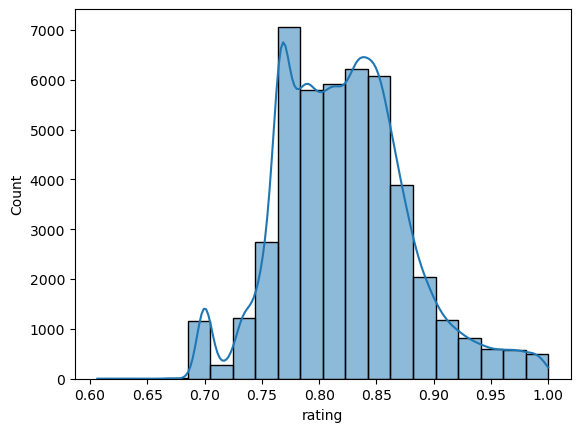

In [111]:
# checking for extreme values in rating
sns.histplot(state_star['rating'], bins=20, kde = True)

In [112]:
state_star['state_province']

5778           Missouri
5779              Texas
5780     North Carolina
5781         California
5782       Pennsylvania
              ...      
52176              Ohio
52177           Florida
52178            Hawaii
52179          Missouri
52180           Indiana
Name: state_province, Length: 46056, dtype: object

## 4. Plotting Chloropleth

In [121]:
data_to_plot = state_star[['state_province','rating']]
data_to_plot.head()

,state_province,rating
5778,Missouri,0.9997
5779,Texas,0.9995
5780,North Carolina,0.9979
5781,California,0.9975
5782,Pennsylvania,0.9974


In [122]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['state_province', 'rating'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)

folium.LayerControl().add_to(map)

In [123]:
map

The above map does show that there are certain states that have higher rated players. One question I would look to answer is are the states with higher rated players due to a lower frequency of recruted players, making teir averages higher. We could do other maps with ratings over and under a certain amount to find states with higher rated recruits. 

In [124]:
map.save('plot_data.html')